In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

%matplotlib inline



In [460]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['legend.fontsize'] = 13

## Class Weight Testing with Logistic Regression ##

In [375]:
df = pd.read_csv('feature_cv_results.csv')

df.shape

(688, 8)

In [376]:
del df['Unnamed: 0']


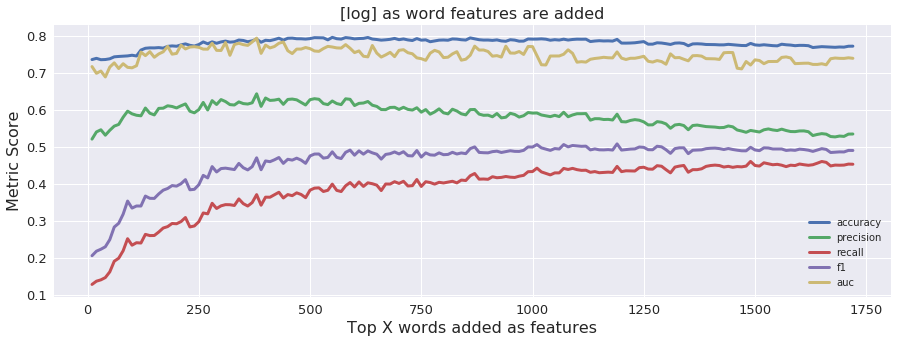

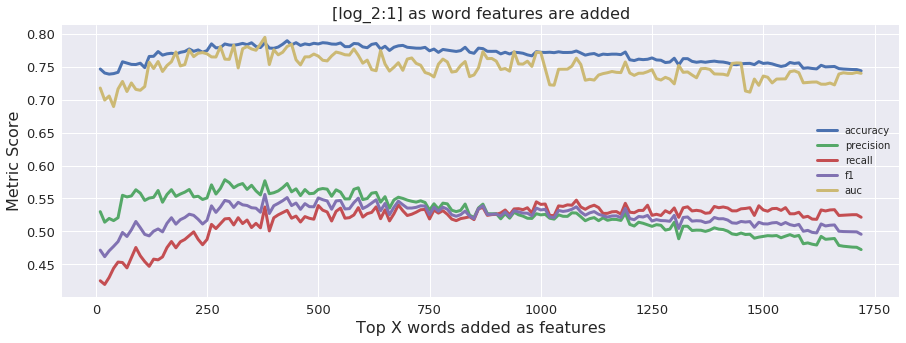

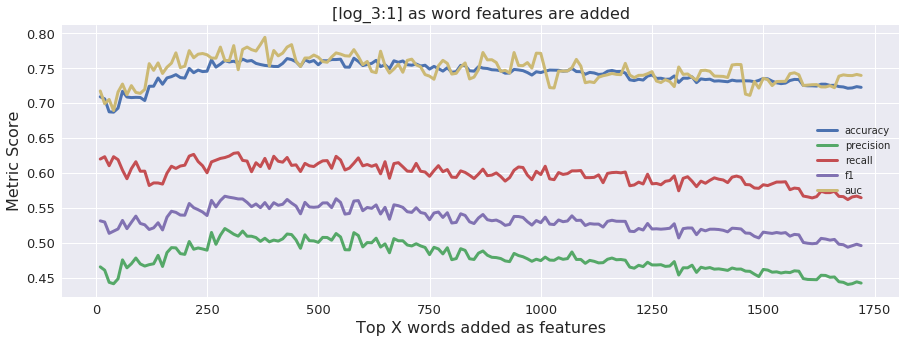

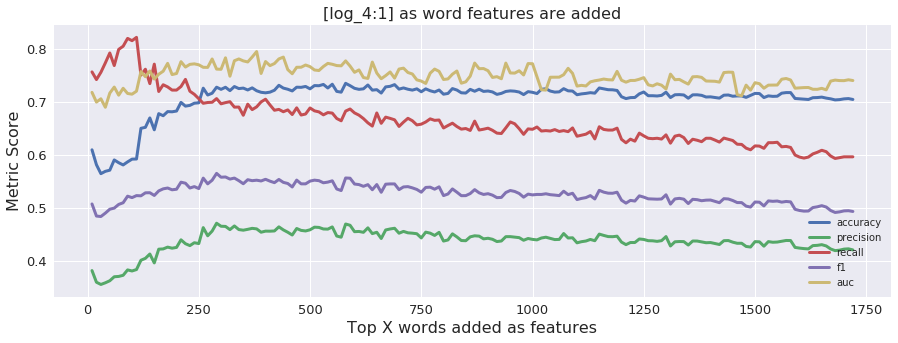

In [377]:
grouped_models = df.groupby('model')
ax = grouped_models.plot(x='num_words', figsize=(15,5), linewidth=3.0);
index = 0
for model_name, _ in grouped_models:
    ax[index].set_title('[{}] as word features are added'.format(model_name))
    ax[index].set_xlabel('Top X words added as features')
    ax[index].set_ylabel('Metric Score')
    index += 1

## Expanded model testing with 2-1 hiphop-pop weight ##

In [378]:
df_other = pd.read_csv('feature_other_cv_results.csv')

del df_other['Unnamed: 0']

df_other.tail(4)

,num_words,model,accuracy,precision,recall,f1,auc
368,930,log_2:1_l1,0.771446,0.524971,0.523346,0.524079,0.749172
369,930,GaussianNB,0.752829,0.488455,0.592607,0.535451,0.740552
370,930,DecisionTree,0.740293,0.463556,0.506615,0.483939,0.649750
371,930,RandomForest,0.825427,0.679440,0.520233,0.589096,0.828490


In [379]:
df_other.shape

(372, 7)

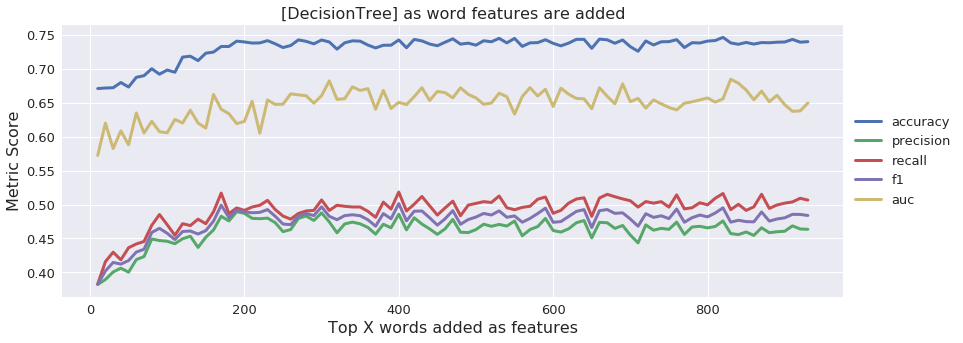

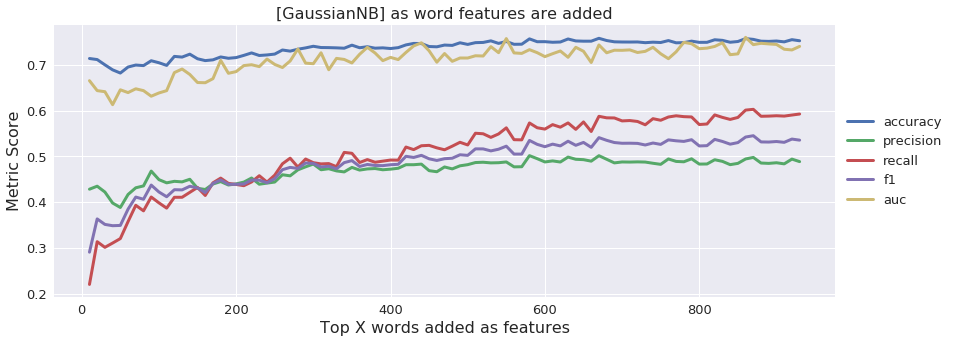

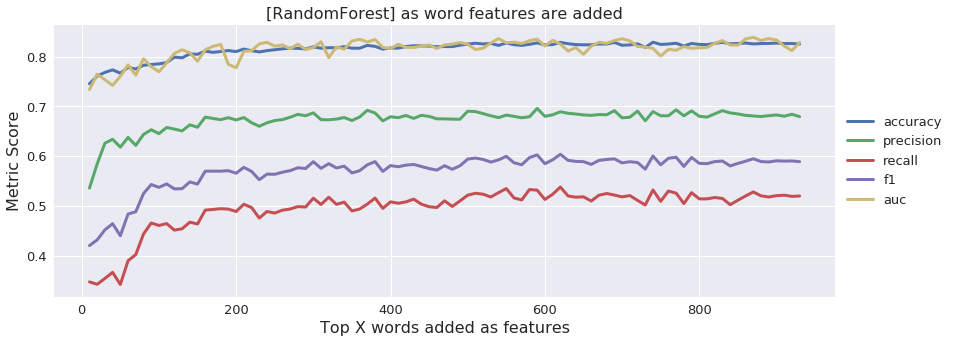

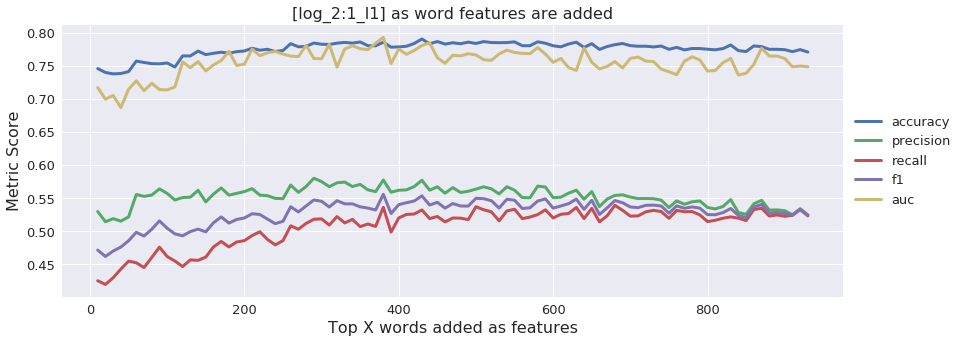

In [473]:
grouped_models = df_other.groupby('model')
ax = grouped_models.plot(x='num_words', figsize=(14,5), linewidth=3.0);
index = 0
for model_name, _ in grouped_models:
    ax[index].set_title('[{}] as word features are added'.format(str(model_name)))
    ax[index].set_xlabel('Top X words added as features')
    ax[index].set_ylabel('Metric Score')
    ax[index].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    index += 1

## Feature Selection as words are added to the set ##

In [381]:
df_feat_imp = pd.read_csv('feature_importance_results.csv')

del df_feat_imp['Unnamed: 0']

df_feat_imp.shape

(90522, 4)

### Generate importance rank per model/number_word trial ###

In [382]:

df_feat_imp = df_feat_imp[df_feat_imp['model'] != 'log']
df_feat_imp['model_word_rank'] = df_feat_imp.groupby(['model','num_words'])['importance'].rank(ascending=False)



In [ ]:
df_feat_imp[(df_feat_imp['num_words'] == 70) & (df_feat_imp['model'] == 'tree100') ].sort_values('importance', ascending=False).head(10)

### Average the rankings across all the trials ###

In [384]:
model_avg_ranks = df_feat_imp.groupby(['model', 'feature'])['model_word_rank'].mean().reset_index()
model_avg_ranks.head(10)

,model,feature,model_word_rank
0,tree100,&,205.571429
1,tree100,abov,440.521739
2,tree100,across,613.285714
3,tree100,act,292.769231
4,tree100,afraid,581.777778
5,tree100,ah,120.120000
6,tree100,ahora,238.705882
7,tree100,aint,274.142857
8,tree100,air,241.666667
9,tree100,aliv,520.000000


### Pivot words from rows to columns ###

In [385]:
model_index = df_feat_imp.pivot_table(index=['model', 'num_words'], columns='feature', values='importance')
#model_index.fillna(0, inplace=True)
model_index.head(20)

feature             &  abov  across  act  afraid  ah  ahora  aint  air  aliv  \
model   num_words                                                              
tree100 10        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        20        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        30        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        40        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        50        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        60        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        70        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        80        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        90        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        100       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        110       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        120       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        130       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        140       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        150       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        160       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        170       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        180       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        190       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   
        200       NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   NaN   

feature            ...    worth     would  write     wrong      yall  \
model   num_words  ...                                                 
tree100 10         ...      NaN       NaN    NaN       NaN       NaN   
        20         ...      NaN  0.020631    NaN       NaN       NaN   
        30         ...      NaN  0.017029    NaN       NaN       NaN   
        40         ...      NaN  0.014054    NaN       NaN       NaN   
        50         ...      NaN  0.012338    NaN       NaN       NaN   
        60         ...      NaN  0.009830    NaN       NaN       NaN   
        70         ...      NaN  0.009231    NaN       NaN       NaN   
        80         ...      NaN  0.008694    NaN       NaN       NaN   
        90         ...      NaN  0.007555    NaN       NaN       NaN   
        100        ...      NaN  0.007901    NaN       NaN       NaN   
        110        ...      NaN  0.007116    NaN       NaN       NaN   
        120        ...      NaN  0.006446    NaN       NaN       NaN   
        130        ...      NaN  0.006068    NaN  0.003030       NaN   
        140        ...      NaN  0.005822    NaN  0.002552       NaN   
        150        ...      NaN  0.005711    NaN  0.002674       NaN   
        160        ...      NaN  0.005517    NaN  0.002337       NaN   
        170        ...      NaN  0.005071    NaN  0.002140  0.009703   
        180        ...      NaN  0.005512    NaN  0.002427  0.008132   
        190        ...      NaN  0.005123    NaN  0.002413  0.010795   
        200        ...      NaN  0.004475    NaN  0.002523  0.010191   

feature                yeah      year       yes  yet  young  
model   num_words                                            
tree100 10              NaN       NaN       NaN  NaN    NaN  
        20              NaN       NaN       NaN  NaN    NaN  
        30         0.018439       NaN       NaN  NaN    NaN  
        40         0.016032       NaN       NaN  NaN    NaN  
        50         0.014252       NaN       NaN  NaN    NaN  
        60         0.012066       NaN       NaN  NaN    NaN  
        70         0.010884       NaN       NaN  NaN    NaN  
        80         0.010127       NaN       NaN  NaN    NaN  
        90         0.008948       

In [386]:
model_index.groupby(level=[0]).head(2)

feature               &  abov  across  act  afraid  ah  ahora  aint  air  \
model     num_words                                                        
tree100   10        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   
          20        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   
tree1000  10        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   
          20        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   
tree10000 10        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   
          20        NaN   NaN     NaN  NaN     NaN NaN    NaN   NaN  NaN   

feature              aliv  ...    worth     would  write  wrong  yall  yeah  \
model     num_words        ...                                                
tree100   10          NaN  ...      NaN       NaN    NaN    NaN   NaN   NaN   
          20          NaN  ...      NaN  0.020631    NaN    NaN   NaN   NaN   
tree1000  10          NaN  ...      NaN       NaN    NaN    NaN   NaN   NaN   
          20          NaN  ...      NaN  0.021000    NaN    NaN   NaN   NaN   
tree10000 10          NaN  ...      NaN       NaN    NaN    NaN   NaN   NaN   
          20          NaN  ...      NaN  0.020919    NaN    NaN   NaN   NaN   

feature              year  yes  yet  young  
model     num_words                         
tree100   10          NaN  NaN  NaN    NaN  
          20          NaN  NaN  NaN    NaN  
tree1000  10          NaN  NaN  NaN    NaN  
          20          NaN  NaN  NaN    NaN  
tree10000 10          NaN  NaN  NaN    NaN  
          20          NaN  NaN  NaN    NaN  

[6 rows x 676 columns]

### Visualize Word Importance Rank as word_count increases ###

[('tree100', model    num_words
  tree100  10                NaN
           20                NaN
           30                NaN
           40                NaN
           50                NaN
           60           0.063187
           70           0.049036
           80           0.044956
           90           0.044118
           100          0.039076
           110          0.042473
           120          0.039339
           130          0.036029
           140          0.032724
           150          0.032669
           160          0.032978
           170          0.026476
           180          0.026623
           190          0.026397
           200          0.029227
           210          0.030870
           220          0.035089
           230          0.033298
           240          0.025240
           250          0.026186
           260          0.030995
           270          0.026164
           280          0.022203
           290          0.022555
           

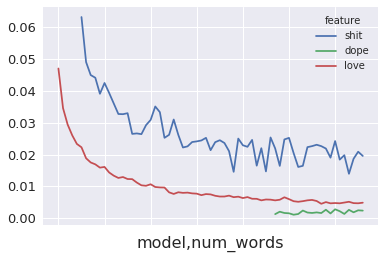

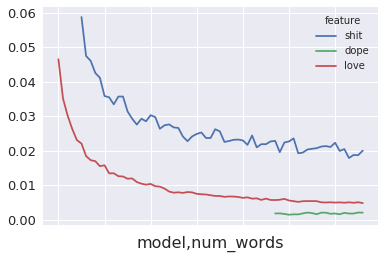

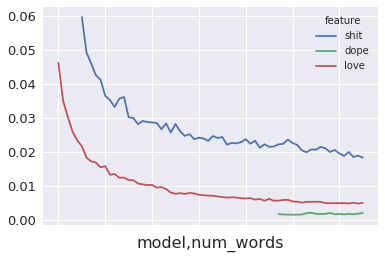

In [387]:
grouped_models = model_index.groupby(level=[0])

grouped_models['shit','dope','love'].plot()

#plt.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
list(grouped_models['shit'])

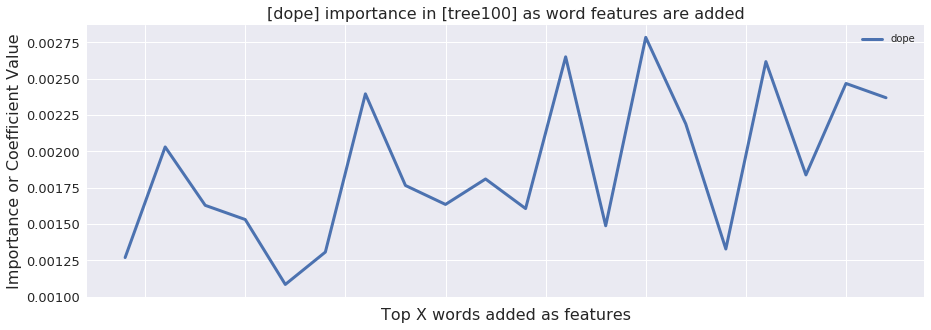

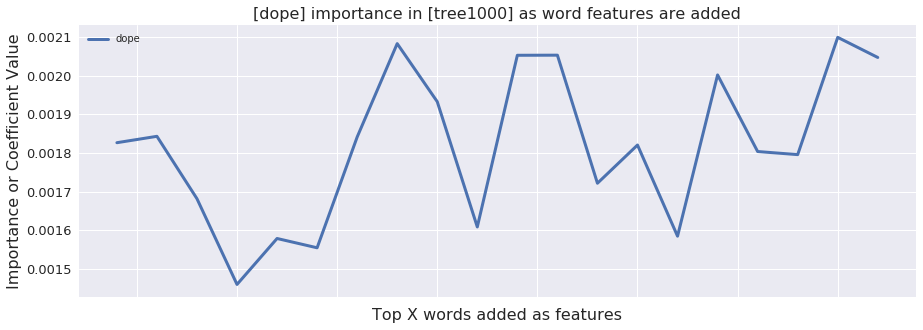

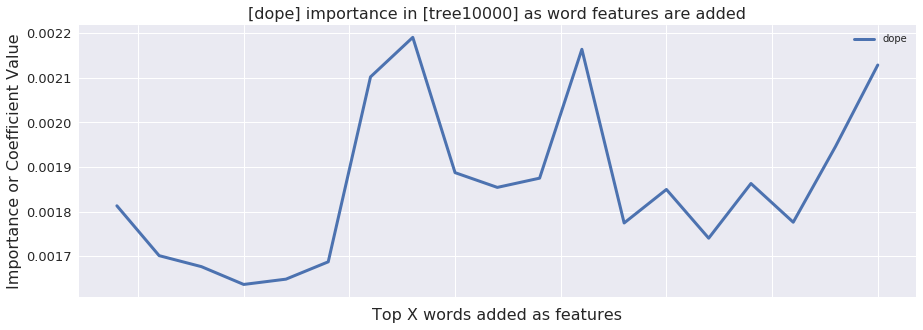

In [388]:
x_ticks = list(model_index.index.levels[1])
grouped_models = model_index.groupby(level=[0])
#group_by = model_index.groupby(level=[0]).plot(y='shit')
feature_to_analyze = 'dope'
ax = grouped_models.plot(y=feature_to_analyze, figsize=(15,5), linewidth=3.0);
index = 0
for model_name, val in grouped_models:
    ax[index].set_title('[{}] importance in [{}] as word features are added'.format(feature_to_analyze, model_name))
    ax[index].set_xlabel('Top X words added as features')
    ax[index].set_ylabel('Importance or Coefficient Value')
    index += 1

### Look at the average importance of words over our trials ###

In [ ]:
model_avg_ranks[model_avg_ranks['model'] == 'tree1000'].sort_values(['model','model_word_rank']).head(5)

In [ ]:
#model_avg_ranks.sort_values(['model','model_word_rank']).head(30)
#ax = plt.subplot(111)
bar_values = None
for group, values in model_avg_ranks.sort_values(['model', 'model_word_rank']).groupby('model'):
    bar_values = values.iloc[0:15]

    #plt.barh(bar_values['feature'], bar_values['model_word_rank'])
    #bar_values.plot(x='model_word_rank', y='feature', kind='barh')
    break
    
bar_values


In [466]:
#model_avg_ranks.sort_values(['model', 'model_word_rank']).groupby('model').head(15)
values = model_avg_ranks.sort_values(['model', 'model_word_rank']).groupby('model')
top_15 = list(values['feature'])

#top_15
list(model_avg_ranks.sort_values(['model', 'model_word_rank']).iloc[0:15])

['model', 'feature', 'model_word_rank']

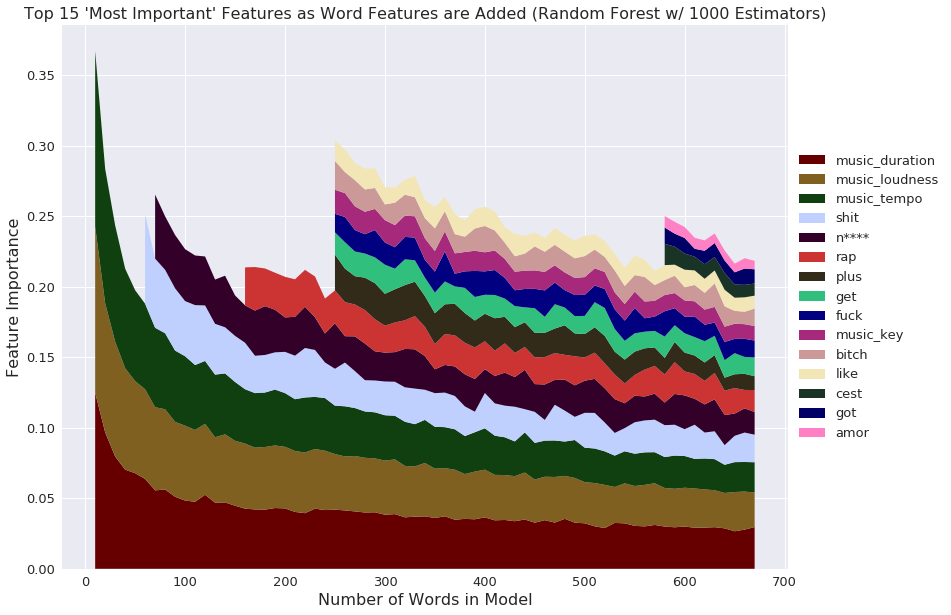

In [474]:
grouped_models = model_index.groupby(level=[0])
#group_by = model_index.groupby(level=[0]).plot(y='shit')
feature_to_analyze = 'dope'
#ax = grouped_models.plot(y=feature_to_analyze, figsize=(15,5), linewidth=3.0);
index = 0
vals = None
test = list(model_avg_ranks.sort_values(['model', 'model_word_rank']).iloc[0:15]['feature'])
for model_name, val in grouped_models:
    vals = val[test]
    break
    #ax[index].set_title('[{}] importance in [{}] as word features are added'.format(feature_to_analyze, model_name))
    #ax[index].set_xlabel('Top X words added as features')
    #ax[index].set_ylabel('Importance or Coefficient Value')
    index += 1

#vals['shit']
#plt.stackplot(vals.index.levels[1], vals['music_duration'],vals['shit']);
colors = ('#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#e6550d', 
       '#fd8d3c', '#fdae6b', '#fdd0a2', '#31a354', '#74c476',
       '#a1d99b', '#c7e9c0', '#756bb1', '#9e9ac8', '#bcbddc')
colors =  ("#FF4A46", "#008941", "#006FA6", "#A30059",
"#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299")
colors = ('#660000', '#7f6020', '#104010', '#bfd0ff', '#330029', '#cc3333', '#332b1a', '#30bf7c', '#000080', '#a6297c', '#cc9999', '#f2e6b6', '#1a3327', '#000066', '#ff80c4') 
plt.figure(figsize=(13,10), facecolor='w')
plt.stackplot(vals.index.levels[1], [vals[x] for x in test], colors=colors)
plt.ylabel('Feature Importance')
plt.xlabel('Number of Words in Model')
plt.title('Top 15 \'Most Important\' Features as Word Features are Added (Random Forest w/ 1000 Estimators)')

#plt.legend([x for x in test])
#box = plt.get_position()
#plt.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
censored_list = ['n****' if x =='nigga' else x for x in test]
plt.legend(censored_list, loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
grouped_models = model_index.groupby(level=[0])
#group_by = model_index.groupby(level=[0]).plot(y='shit')
feature_to_analyze = 'dope'
#ax = grouped_models.plot(y=feature_to_analyze, figsize=(15,5), linewidth=3.0);
index = 0
vals = None
test = list(model_avg_ranks.sort_values(['model', 'model_word_rank']).iloc[0:15]['feature'])
for model_name, val in grouped_models:
    vals = val[test]
    
    #ax[index].set_title('[{}] importance in [{}] as word features are added'.format(feature_to_analyze, model_name))
    #ax[index].set_xlabel('Top X words added as features')
    #ax[index].set_ylabel('Importance or Coefficient Value')
    index += 1

#vals['shit']
vals.fillna(0, inplace=True)
plt.stackplot(vals.index.levels[1], list(vals['music_duration']),);
#list(vals['music_duration'])

In [424]:
list(vals['music_duration'])

[0.1244230112586576,
 0.09506697290719192,
 0.08083888653001145,
 0.07038949209976482,
 0.06716027481277251,
 0.06377884056864297,
 0.055713443409115514,
 0.055869165295195984,
 0.05220360779929832,
 0.05044788982625982,
 0.047415644565545916,
 0.052199691594439115,
 0.0490204013267469,
 0.0465806911630213,
 0.045112701942117965,
 0.04295727762430278,
 0.042263717725314065,
 0.04166862769309087,
 0.04347362833614544,
 0.04279014019742967,
 0.041095052738324006,
 0.03988277581759202,
 0.042094760480787856,
 0.0421715814423365,
 0.04184468479089304,
 0.04113424593387111,
 0.04007975562748669,
 0.0390755028642508,
 0.03915902074240417,
 0.03849873868621845,
 0.0388868582733209,
 0.0372764432504604,
 0.03697970379600743,
 0.03735645026786563,
 0.03710799054042639,
 0.036500995795500465,
 0.035201155569858825,
 0.035483025970974726,
 0.03404970795161956,
 0.03569763157354898,
 0.03332072047894462,
 0.033834777434655815,
 0.034582665857452906,
 0.0332185073498001,
 0.032013079994198536,
 0.0